# Analysis of HR Turnover Data

--Used only for IBM Applied Data Science Capstone Project

# 1.	Introduction: Business Problem

In this project, I will use the data analysis skills I learned to solve a problem related to my work. I worked as a HRIS Specialist; I have been dealing with a lot of HR data. Currently, my company is facing a new problem, the turnover rate is getting much higher than normal. So, the HR VP wants me to do some analysis on the turnover data to find out why the turnover rate is getting higher, are the terminated employees somewhat have same characteristic? For example, are they all have higher education? How long have they been stayed with the company? Will the gender affect turnover rate? etc.

We will use our data science power to analysis the data based on certain criteria and provide some best possible reasons that will cause the problem and then we can work with other teams to implement some project to prevent the termination happen. Then finally lower the hiring and training cost of the company.

# 2.	Data
Nowadays, most of the big companies are using centralized HR data system to store employee data. So, it is very easy to get data from the system. Most of the HR software also provides report output which can be saved as excel, csv etc. So, in this project, my data source will be a report from HR system.

In this project, we will try to get a report from the HR system what contain: Termination Status, Hire Date, Marital Status, Birth Date, Gender, Highest Education, Termination Date, Termination Reason, Etc. 


We will try to analysis whether below characteristics like Gender, Material Status, Education, Tenure with the company will affect the termination. No personal data will be included. And also, the data will just be some sample date from the system.

However, the data from the HR system will also has some issue, like tome data sets don’t have complete value, like Highest education, Marital Status are not mandatory fields in the system. We will do data cleaning before we analysis the data.

This analysis will only use the termination with recent 2 years as the old data may not reflect the current market status. Also, we are only analysis voluntary termination. The involuntary terminations are not included in this analysis as we are trying to find the reason that cause the voluntary termination and then implement some method to prevent this happen.

# 3. Methodology
First, I designed a report from the HR system, which contain this information: Record ID, Status, Termination Date, Hire Date, Birth Date, Marital Status, Gender, Highest Education, Termination Reason. Run this report and save it as a HRTurnover.csv file, Then upload this csv file to github.

In [1]:
# Import this file from github to python use Panda data frame
import numpy as np
import pandas as pd

In [2]:
# Import the csv file
df = pd.read_csv ('https://raw.githubusercontent.com/qinger0722/Coursera_Capstone/master/HRTurnover.csv')

In [3]:
# Show sample of the original data
df.head()

,Record ID,Status,Termination Date,Hire Date,Birthdate,Marital Status,Gender,Highest Education,Termination Reason
0,1,Terminated,4/25/2019,7/23/2018,11/14/1977,Single,Male,C - HS Grad,Voluntary-Another Job
1,2,Terminated,2/19/2020,7/15/2019,1/4/1993,Single,Male,A - Not Indic,Voluntary-Personal Reasons
2,3,Terminated,10/18/2019,5/16/1977,10/18/1957,Single,Female,D - Some Coll.,Retire-Normal
3,4,Terminated,3/22/2019,5/8/2012,9/18/1966,Married,Female,C - HS Grad,Voluntary-Another Job
4,5,Terminated,1/4/2019,8/27/1975,1/13/1952,Married,Female,C - HS Grad,Retire-Normal


As we could see from the sample data, we have the termination date, hire date, birthdate, we need to calculate the Age, Tenure (year with the company) to start the analysis. For age, we need to calculate the Age when they were terminated, so we use the termination date minus birth date; For tenure, we calculate how long they have been with the company, so we use termination minus hire date.

In [4]:
# Calculate age from birthdate to termination date
from datetime import date 
df['Age'] = (np.floor((pd.to_datetime(df['Termination Date']) - 
             pd.to_datetime(df['Birthdate'])).dt.days / 365.25)).astype(int)

In [5]:
# Calculage tenure of the terminated employee from their termination date and hire date
df['Tenure'] = round(((pd.to_datetime(df['Termination Date']) - 
             pd.to_datetime(df['Hire Date'])).dt.days / 365.25), 2)

In [6]:
# Show the data with age and tenure
df.head()

,Record ID,Status,Termination Date,Hire Date,Birthdate,Marital Status,Gender,Highest Education,Termination Reason,Age,Tenure
0,1,Terminated,4/25/2019,7/23/2018,11/14/1977,Single,Male,C - HS Grad,Voluntary-Another Job,41,0.76
1,2,Terminated,2/19/2020,7/15/2019,1/4/1993,Single,Male,A - Not Indic,Voluntary-Personal Reasons,27,0.60
2,3,Terminated,10/18/2019,5/16/1977,10/18/1957,Single,Female,D - Some Coll.,Retire-Normal,61,42.42
3,4,Terminated,3/22/2019,5/8/2012,9/18/1966,Married,Female,C - HS Grad,Voluntary-Another Job,52,6.87
4,5,Terminated,1/4/2019,8/27/1975,1/13/1952,Married,Female,C - HS Grad,Retire-Normal,66,43.36


After we modified the data set, the sample is like above.

In [7]:
# Show how many rows and columns in this data set
df.shape

(842, 11)

We use df.shape to show how many record in this data set, ant id shows we have 11 columns and 842 records in this data frame.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

Now we are going to analysis the data. 

First, we are trying to show if the turnover is having anything with the age, we use a scatter plot to show all the termination record with their ages. We got below plot. From the plot, we kind of find that the turnover is higher when people are young. So, when people are young, they more tend to change jobs.


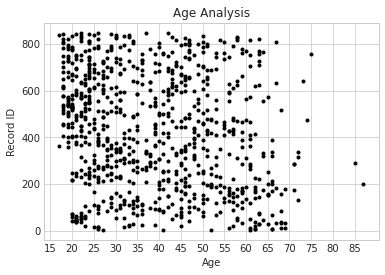

In [9]:
# Show a scatter plot of Age with all records

x = df['Age']
y = df['Record ID']
plt.title('Age Analysis')
plt.xlabel('Age')
plt.ylabel('Record ID')

x_ticks = np.arange(0, 90, 5)
plt.xticks(x_ticks)

plt.plot(x, y, '.', color='black');

Second, we are analysis the Tenure when employees were terminated. We simply use a scatter plot showing all records on a tenure map. We could simply notice that most of the terminations within 5 years. Within 5 years, most of the terminations are within a year. 


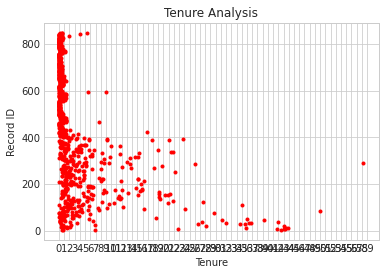

In [10]:
# Show a scatter plot of Tenure with all records

x = df['Tenure']
y = df['Record ID']
plt.title('Tenure Analysis')
plt.xlabel('Tenure')
plt.ylabel('Record ID')

x_ticks = np.arange(0, 60, 1)
plt.xticks(x_ticks)

plt.plot(x, y, '.', color='red');

Now we are analysis tenure with age. We see that then age grows, tenure get longer, but that’s very natural, if you stay with a company, your tenure grows when you get older.

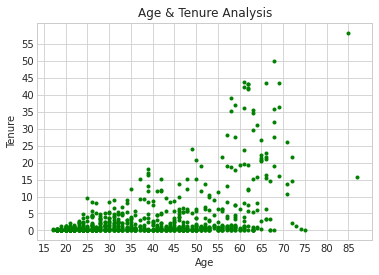

In [11]:
# Show a scatter plot of Tenure and Age.

x = df['Age']
y = df['Tenure']
plt.title('Age & Tenure Analysis')
plt.xlabel('Age')
plt.ylabel('Tenure')

x_ticks = np.arange(0, 90, 5)
plt.xticks(x_ticks)

y_ticks = np.arange(0, 60, 5)
plt.yticks(y_ticks)

plt.plot(x, y, '.', color='green');

Now we are trying to analysis turnover with Highest Education. We found that most of the records don’t indicate the highest education. So this analysis may not reflect the trend, but we could find that people with High School and Bachelor’s degree are having more turnover. But since a lot of the records don’t indicate education, then this result may not show the full picture.

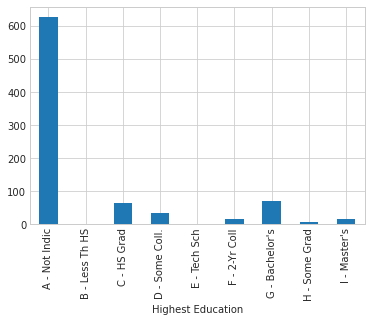

In [12]:
# Use Bar Chart to Analysis Education and Turnover
df = df.replace(np.nan,0)
df = df.groupby(['Highest Education'])['Record ID'].count()

df.plot.bar()

# 4. Results

From the age analysis, we found that a when people are young, they are more tending to change jobs. When people get older, they are more stable. The reason may because of that when people are young, they don’t know what the really like when they are choosing a job, so we should pay more attention when we are hiring young employee, giving them more advises and more details of the job as they don’t have a lot of experience to know what the job will look like when they gets hired. If they know more, they should be able to make a wise decision and then lower the turnover rate at the younger generation.

From the tenure analysis, we found that the turnover is very high at a lower tenure year. Most of the employee are terminated within a year. What’s the reason for this? From my opinion, it could be because of the lack of training to the new employee. When employee are hired, they are not familiar with the new job, if we provide more training to them, they should be more confident with their job and keep growing on that position.


# 5.	Discussion
We found that when we trying to analysis the Highest Education, most of employee’s highest education are not indicated. When we need to audit the data in our system or implement a new way to collect the education information from our employee. Then we may have a full picture to analysis turnover from this angle.


# 6.	Conclusion
Giving more advises and more details of the job when we are hiring young candidates as they don’t have a lot of experience to know what the job will look like when they gets hired. If they know more, they should be able to make a wise decision and then lower the turnover rate at the younger generation.
Provide more training to employee when they just get hired. A lot of termination happened in the first year, so provide more training could give them more skills with the job and then lower the turnover rate.
Audit data in the system and implement some way to get the data we needed for analysis.


# My full report of analysis

https://github.com/qinger0722/Coursera_Capstone/blob/master/Analysis%20of%20HR%20Turnover%20Data.pdf